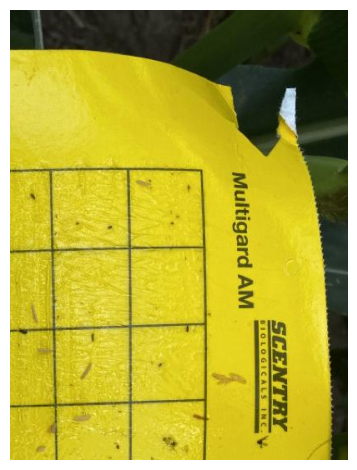

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

def read_labels(label_file):
    with open(label_file, 'r') as f:
        lines = f.readlines()
    
    boxes = []
    for line in lines:
        _, x_center, y_center, width, height = map(float, line.strip().split())
        boxes.append((x_center, y_center, width, height))
    
    return boxes

def visualize_boxes(image_file, label_file):
    # Read the image
    img = Image.open(image_file)
    img_width, img_height = img.size

    # Read the labels
    boxes = read_labels(label_file)

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(img)

    # Create a Rectangle patch for each box
    for box in boxes:
        x_center, y_center, width, height = box
        
        # Convert relative coordinates to absolute pixel coordinates
        x = (x_center - width/2) * img_width
        y = (y_center - height/2) * img_height
        box_width = width * img_width
        box_height = height * img_height

        rect = patches.Rectangle((x, y), box_width, box_height, 
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Usage
image_file = '/Users/muhammadarbabarshad/Downloads/AgEval-datasets/insectcount/train/images/July-28-2022-69_jpg.rf.11fa8291391c308552183291c6ef84ae.jpg'
label_file = '/Users/muhammadarbabarshad/Downloads/AgEval-datasets/insectcount/train/labels/July-28-2022-69_jpg.rf.11fa8291391c308552183291c6ef84ae.txt'
visualize_boxes(image_file, label_file)